In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)

print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.17.4
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


# DATA
## Enzyme

In [2]:
enzyme_base = pd.read_csv('Enzyme_tradeoff_20201.csv',index_col=0)
enzyme_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,1.541601,1.490596,1.462449,1.431839,1.411691,1.401499,1.399105,1.419758,1.448073,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0,0.233644,0.230462,0.229650,0.228963,0.228387,0.225676,0.225310,0.225084,0.224929,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,2.323268,2.264856,2.220876,2.175904,2.146998,2.150887,2.164466,2.172344,2.208695,...,5.749364,5.630425,5.512211,5.394465,5.289536,5.196141,5.073596,4.976025,4.871601,4.769240
Tax4,0.0,0.182814,0.182570,0.182836,0.184356,0.182430,0.184925,0.187454,0.191432,0.194827,...,24.911670,24.879124,24.812315,24.729578,24.679040,24.670763,24.457956,24.366314,24.297201,24.261345
Tax5,0.0,0.492399,0.489036,0.486234,0.484414,0.483302,0.482955,0.483093,0.484332,0.485803,...,0.083167,0.082876,0.082586,0.082261,0.081972,0.081734,0.081372,0.081049,0.080734,0.080447


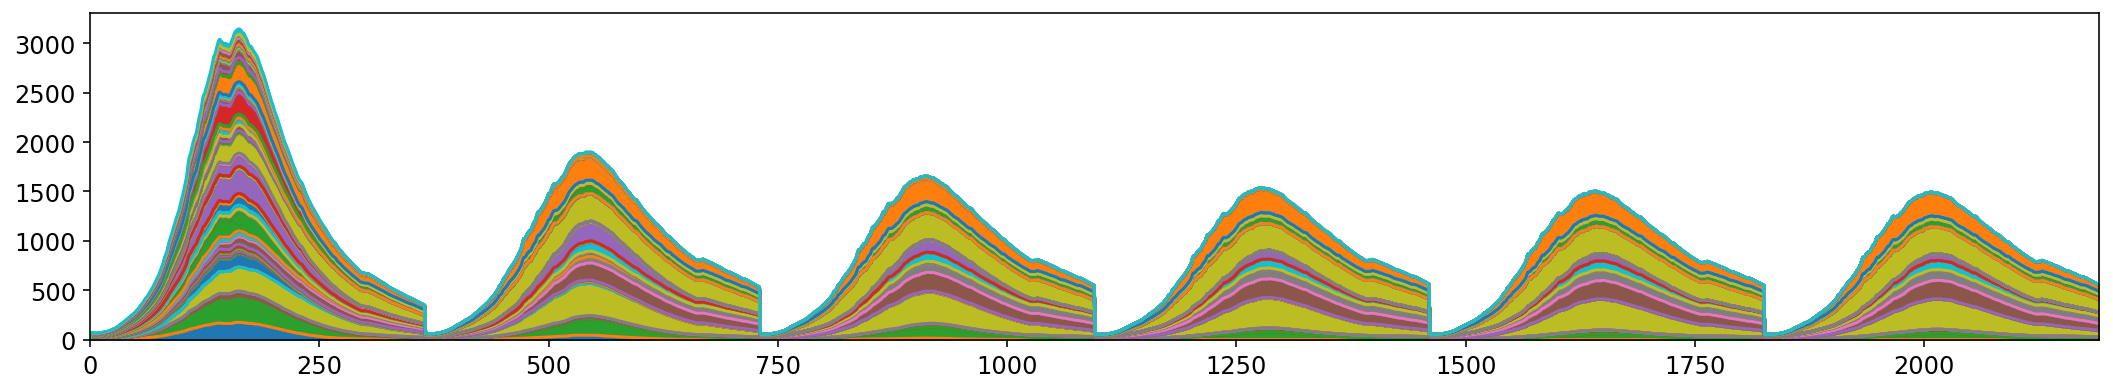

In [3]:
enzyme_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## Osmolyte

In [4]:
osmolyte_base = pd.read_csv('Osmolyte_tradeoff_20201.csv',index_col=0)
osmolyte_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.0,0.000148,0.000289,0.000497,0.000664,0.000833,0.000958,0.001180,0.001297,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0,0.0,0.000009,0.000020,0.000036,0.000051,0.000067,0.000079,0.000098,0.000108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,0.0,0.000341,0.000631,0.001059,0.001377,0.001692,0.001899,0.002288,0.002444,...,0.001815,0.001878,0.001856,0.001759,0.001780,0.001879,0.001541,0.001494,0.001457,0.001460
Tax4,0.0,0.0,0.000098,0.000206,0.000374,0.000521,0.000677,0.000798,0.000991,0.001097,...,0.057773,0.061229,0.061794,0.059923,0.061524,0.066580,0.055071,0.054014,0.054069,0.055201
Tax5,0.0,0.0,0.000059,0.000128,0.000240,0.000341,0.000445,0.000524,0.000652,0.000717,...,0.000052,0.000054,0.000054,0.000051,0.000053,0.000059,0.000048,0.000048,0.000047,0.000050


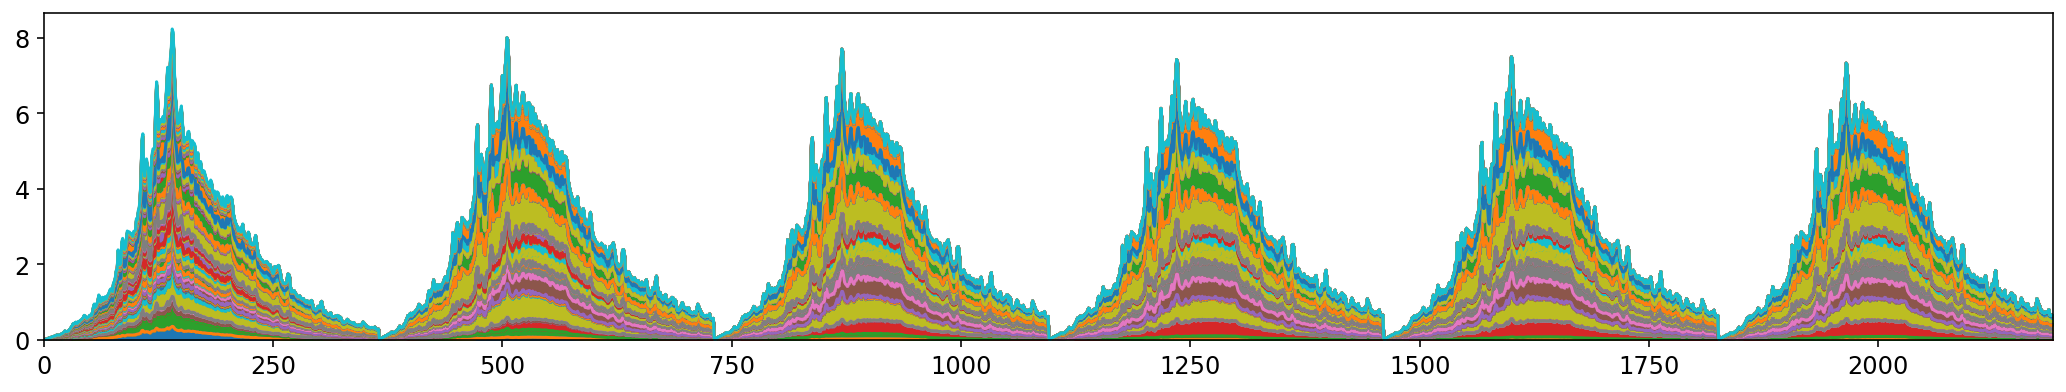

In [5]:
osmolyte_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## yield

In [6]:
yield_base = pd.read_csv('Yield_tradeoff_20201.csv',index_col=0)
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,-2.997457,-2.342049,-1.748957,-0.901327,-0.227131,0.431635,0.909272,1.712073,2.100585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0,-0.422814,-0.388092,-0.353625,-0.300141,-0.251445,-0.198635,-0.160153,-0.099786,-0.068112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0,-3.394895,-2.610202,-1.947786,-0.997847,-0.300472,0.343782,0.750583,1.540250,1.809157,...,-4.737306,-4.452661,-4.335917,-4.365341,-4.171309,-3.846521,-4.346430,-4.263820,-4.122149,-3.967216
Tax4,0.0,-0.848852,-0.664499,-0.462017,-0.151413,0.134274,0.417646,0.633402,0.978774,1.162224,...,-9.004946,-2.927215,-1.936593,-5.212972,-2.115223,6.841389,-13.282888,-13.667028,-11.119964,-8.813995
Tax5,0.0,-0.949917,-0.841981,-0.718257,-0.522667,-0.346992,-0.168490,-0.033449,0.184326,0.292620,...,-0.073456,-0.069872,-0.068704,-0.073843,-0.069791,-0.060403,-0.076996,-0.076098,-0.074662,-0.069794


### get rid of negative vals

In [8]:
yield_base[yield_base < 0] = 0
yield_base.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.0,0.0,0.0,0.0,0.000000,0.431635,0.909272,1.712073,2.100585,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.000000,0.343782,0.750583,1.540250,1.809157,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.134274,0.417646,0.633402,0.978774,1.162224,...,0.0,0.0,0.0,0.0,0.0,6.841389,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.184326,0.292620,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


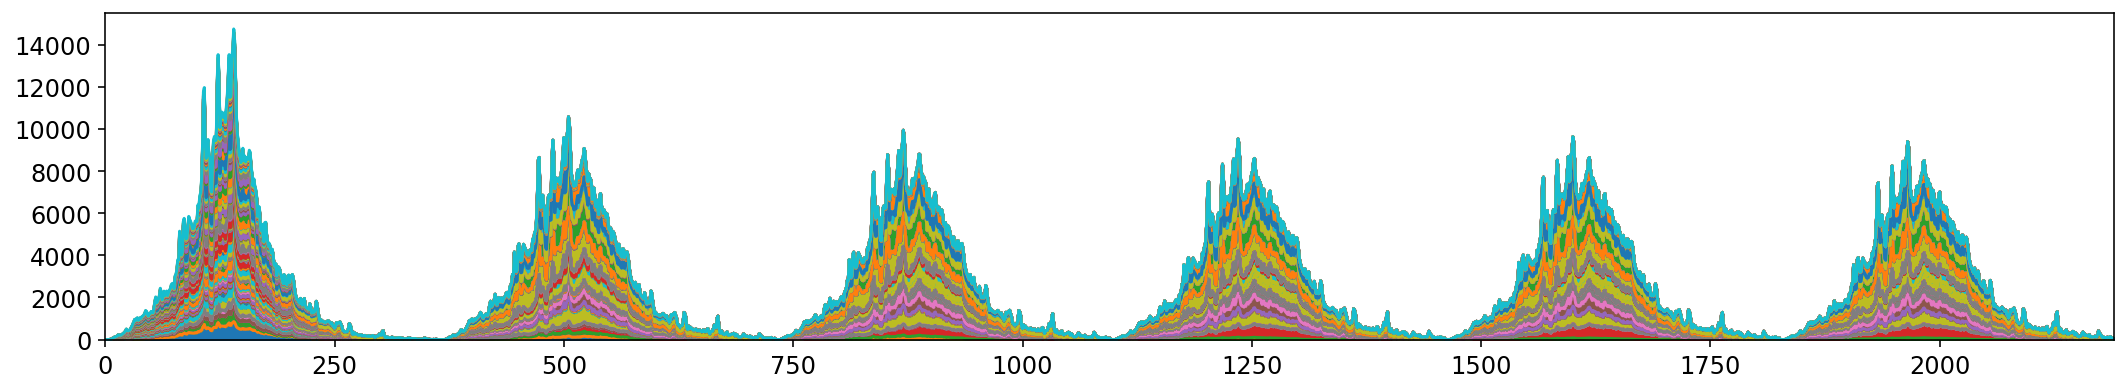

In [9]:
yield_base.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## tradeoffx10

In [26]:
enzyme_basex10 = pd.read_csv('Enzyme_tradeoffx10_20201.csv',index_col=0)
enzyme_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,1.541601,1.490596,1.462449,1.431839,1.411691,1.401499,1.399105,1.419758,1.448073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.233644,0.230462,0.229650,0.228963,0.228387,0.225676,0.225310,0.225084,0.224929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,2.323268,2.264856,2.220876,2.175904,2.146998,2.150887,2.164466,2.172344,2.208695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.182814,0.182570,0.182836,0.184356,0.182430,0.184925,0.187454,0.191432,0.194827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.492399,0.489036,0.486234,0.484414,0.483302,0.482955,0.483093,0.484332,0.485803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


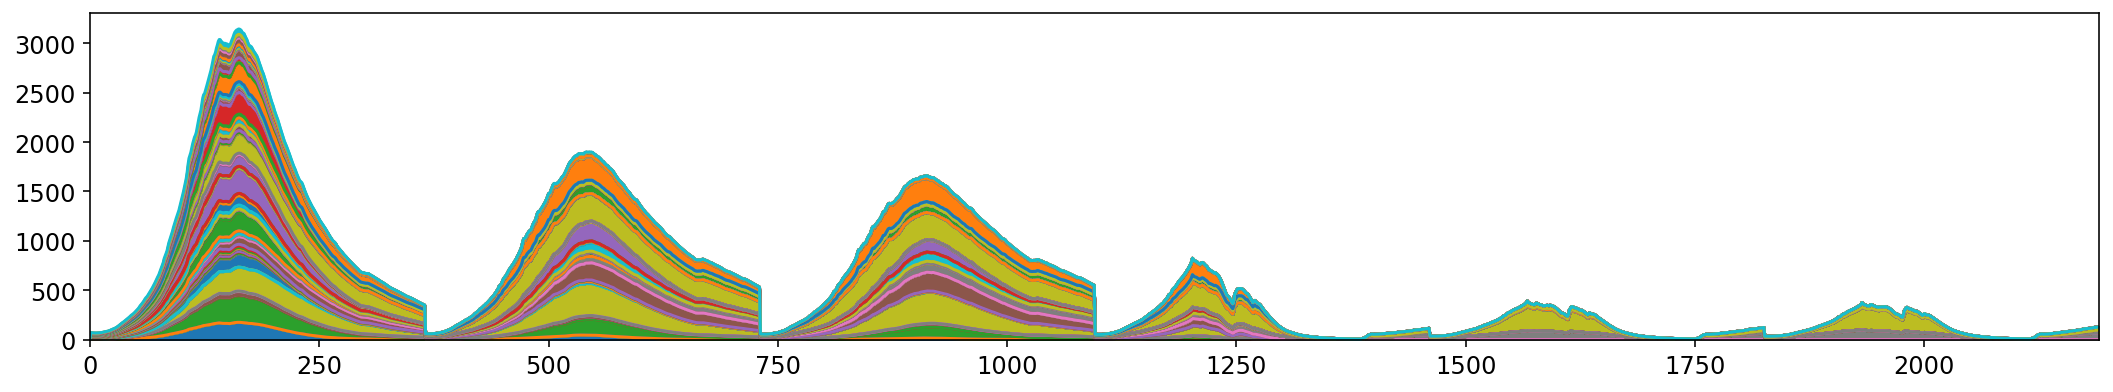

In [27]:
enzyme_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

In [28]:
osmolyte_basex10 = pd.read_csv('Osmolyte_tradeoffx10_20201.csv',index_col=0)
osmolyte_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.0,0.000148,0.000289,0.000497,0.000664,0.000833,0.000958,0.001180,0.001297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.000009,0.000020,0.000036,0.000051,0.000067,0.000079,0.000098,0.000108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.000341,0.000631,0.001059,0.001377,0.001692,0.001899,0.002288,0.002444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.000098,0.000206,0.000374,0.000521,0.000677,0.000798,0.000991,0.001097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.000059,0.000128,0.000240,0.000341,0.000445,0.000524,0.000652,0.000717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


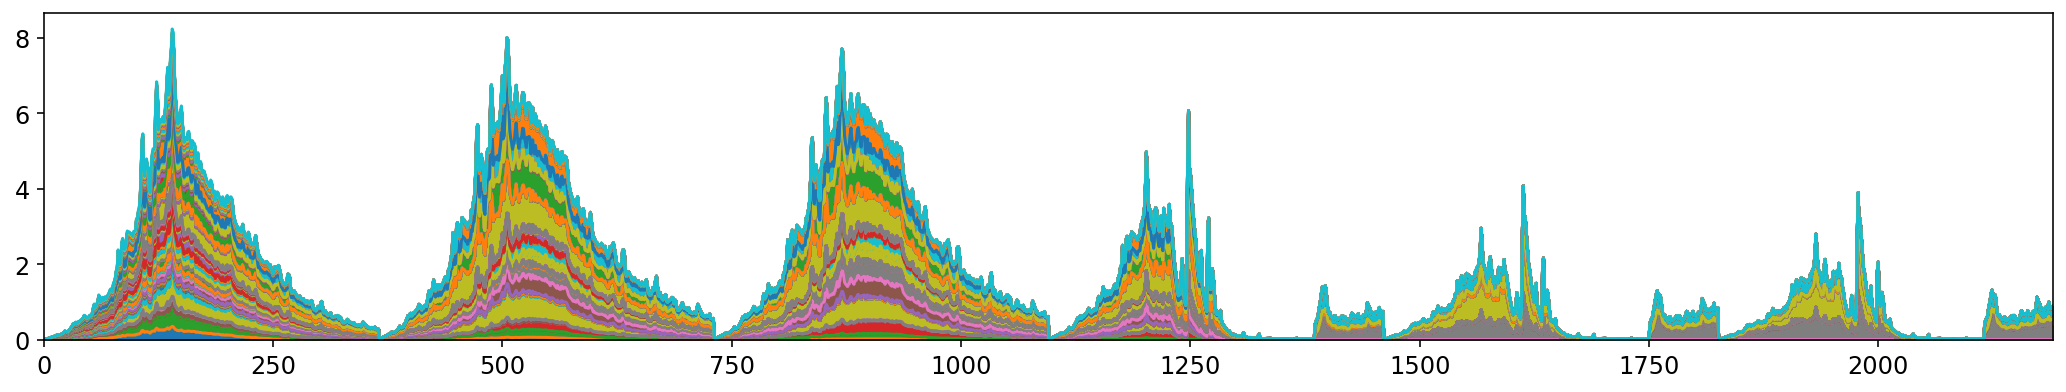

In [29]:
osmolyte_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

In [30]:
yield_basex10 = pd.read_csv('Yield_tradeoffx10_20201.csv',index_col=0)
yield_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,-2.997457,-2.342049,-1.748957,-0.901327,-0.227131,0.431635,0.909272,1.712073,2.100585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,-0.422814,-0.388092,-0.353625,-0.300141,-0.251445,-0.198635,-0.160153,-0.099786,-0.068112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,-3.394895,-2.610202,-1.947786,-0.997847,-0.300472,0.343782,0.750583,1.540250,1.809157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,-0.848852,-0.664499,-0.462017,-0.151413,0.134274,0.417646,0.633402,0.978774,1.162224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,-0.949917,-0.841981,-0.718257,-0.522667,-0.346992,-0.168490,-0.033449,0.184326,0.292620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
yield_basex10[yield_basex10 < 0] = 0
yield_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190
Tax1,0.0,0.0,0.0,0.0,0.0,0.000000,0.431635,0.909272,1.712073,2.100585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0,0.0,0.0,0.0,0.0,0.000000,0.343782,0.750583,1.540250,1.809157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0,0.0,0.0,0.0,0.0,0.134274,0.417646,0.633402,0.978774,1.162224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.184326,0.292620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


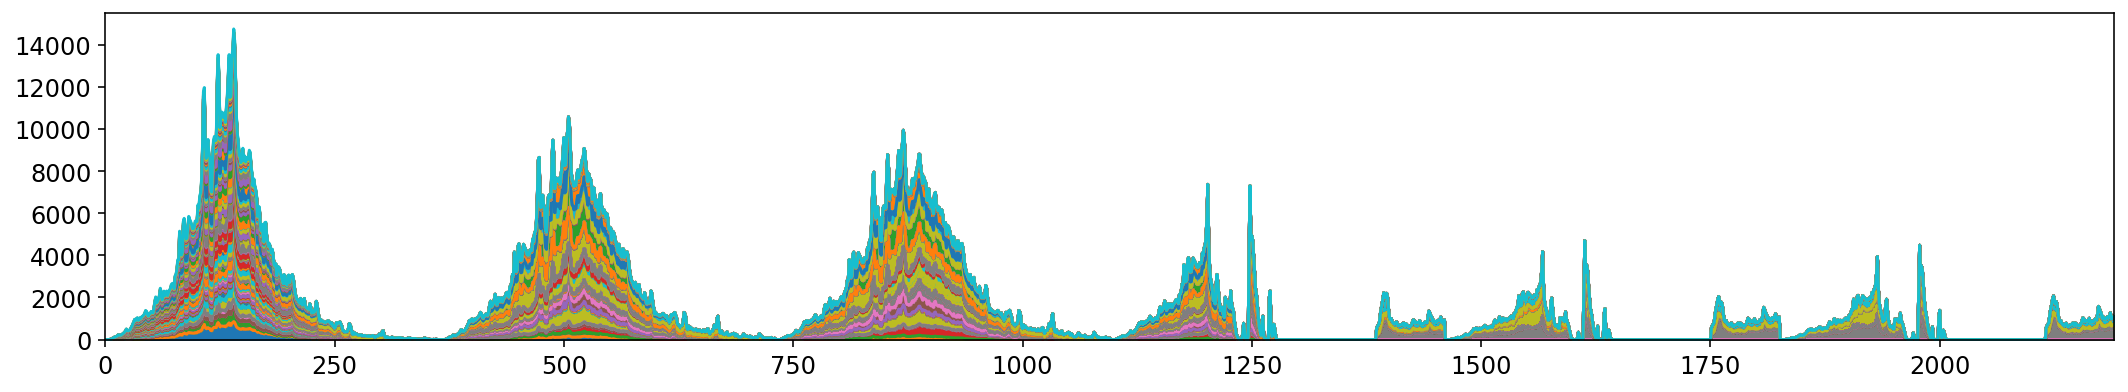

In [32]:
yield_basex10.T.plot.area(fontsize=12,legend=False,figsize=(18,3))

## define function of deriving data of a specific day

In [33]:
def day_data(day):
    
    day = pd.concat([enzyme_base.loc[:,str(day)], osmolyte_base.loc[:,str(day)],yield_base.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

In [12]:
day_2_alive = day_data(2)
day_2_alive

,Enzyme,Osmolyte,Yield
Tax1,99.990103,0.009897,0.0
Tax2,99.995990,0.004010,0.0
Tax3,99.984938,0.015062,0.0
Tax4,99.946500,0.053500,0.0
Tax5,99.987837,0.012163,0.0
...,...,...,...
Tax96,99.996958,0.003042,0.0
Tax97,99.997495,0.002505,0.0
Tax98,99.992258,0.007742,0.0
Tax99,99.995021,0.004979,0.0


In [18]:
day_5_alive = day_data(5)
day_5_alive

,Enzyme,Osmolyte,Yield
Tax1,99.952964,0.047036,0.00000
Tax2,99.977509,0.022491,0.00000
Tax3,99.935917,0.064083,0.00000
Tax4,57.507983,0.164137,42.32788
Tax5,99.929400,0.070600,0.00000
...,...,...,...
Tax96,99.986283,0.013717,0.00000
Tax97,99.988676,0.011324,0.00000
Tax98,99.966239,0.033761,0.00000
Tax99,99.976226,0.023774,0.00000


## base

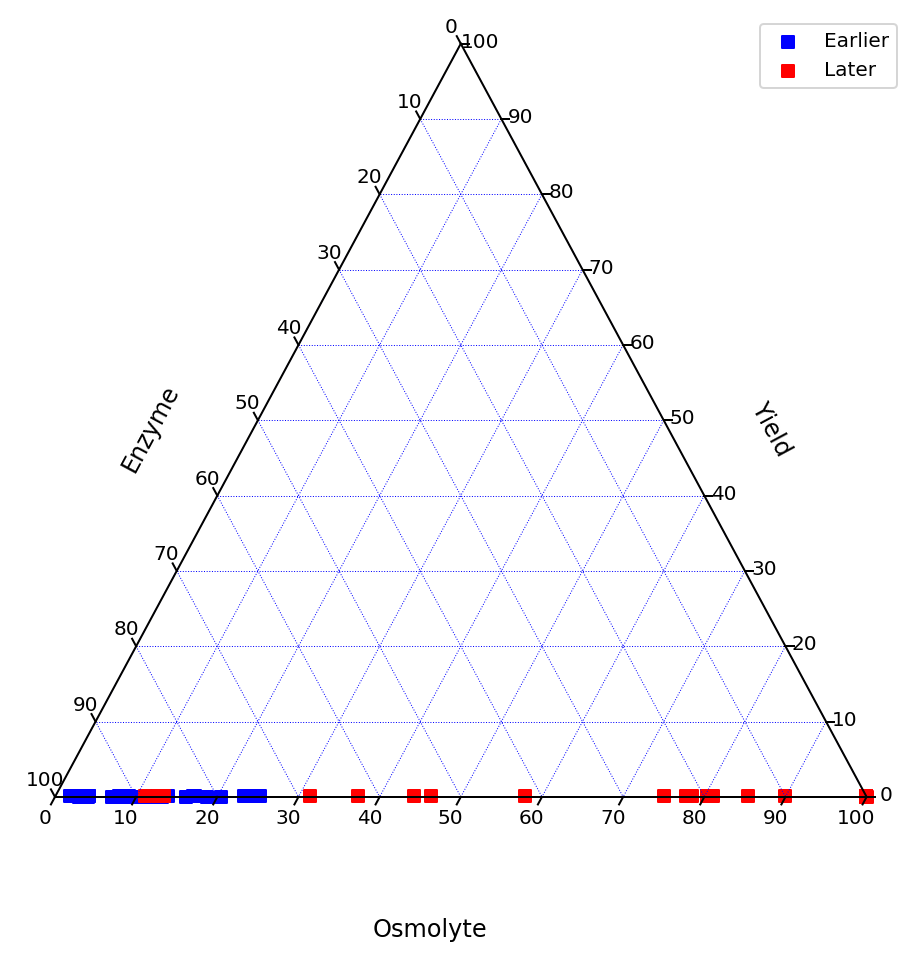

In [119]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)

#tax.scatter(day_2_alive.values, marker='.', color='red', label="Red Squares")
#tax.scatter(day_5_alive.values, marker='.', color='red',label="Red Squares")
#tax.scatter(day_data(100).values, marker='.', color='orange',label="Red Squares")
#tax.scatter(day_data(150).values, marker='.', color='green',label="Red Squares")
#tax.scatter(day_data(200).values, marker='.', color='black',label="Red Squares")
tax.scatter(day_data(365*3-257).values, marker='s', color='blue',label="Earlier") # start of dry season

#tax.scatter(day_data(365*3-97).values,  marker='s', color='orange', label="Later")   # drought peak

tax.scatter(day_data(365*3-75).values,  marker='s', color='red', label="Later")   # end of dry season


tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

## define function of tradeoffx10

In [35]:
def day_datax10(day):
    
    day = pd.concat([enzyme_basex10.loc[:,str(day)], osmolyte_basex10.loc[:,str(day)],yield_basex10.loc[:,str(day)]],axis=1,sort=False)
    day.columns = ['Enzyme','Osmolyte', 'Yield']
    total = day.sum(axis=1)
    day_alive = 100*day[total>0].divide(total[total>0],axis=0)
    
    return day_alive

## base vs basex10

In [140]:
day_data(365*6-75)

,Enzyme,Osmolyte,Yield
Tax3,99.940681,0.059319,0.000000
Tax4,29.567113,0.132088,70.300799
Tax5,99.882168,0.117832,0.000000
Tax9,99.911004,0.088996,0.000000
Tax23,71.830610,0.136255,28.033135
Tax24,99.942181,0.057819,0.000000
Tax26,99.883748,0.116252,0.000000
Tax28,77.975782,0.145890,21.878328
Tax39,10.856271,0.102293,89.041436
Tax40,76.383276,0.122013,23.494711


In [139]:
day_datax10(365*6-75)

,Enzyme,Osmolyte,Yield
Tax28,99.807697,0.192303,0.0
Tax59,99.885362,0.114638,0.0
Tax73,99.634487,0.365513,0.0
Tax80,99.631860,0.368140,0.0


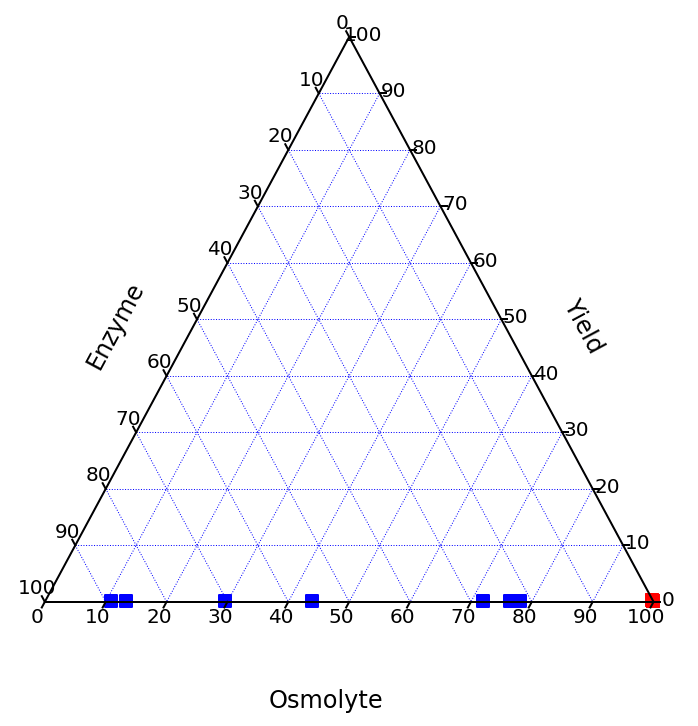

In [138]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(6,6)

#tax.scatter(day_data(365*6-200).values,    marker='o', color='blue',label="Red Squares")
#tax.scatter(day_datax10(365*6-200).values, marker='s', color='red', label="Red Squares")

tax.scatter(day_data(365*6-75).values,    marker='s', color='blue', label="Base")
tax.scatter(day_datax10(365*6-75).values, marker='s', color='red',label="Basex10")
#tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

# community-level

In [81]:
community_base = pd.concat([enzyme_base.sum(axis=0),osmolyte_base.sum(axis=0),yield_base.sum(axis=0)],axis=1,sort=False)
community_base.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_base.sum(axis=1)
community_base_alive = 100*community_base[total>0].divide(total[total>0],axis=0)
community_base_alive

,Enzyme,Osmolyte,Yield
1,100.000000,0.000000,0.000000
2,99.989153,0.010847,0.000000
3,99.978364,0.021636,0.000000
4,99.961732,0.038268,0.000000
5,95.459282,0.049784,4.490933
...,...,...,...
2186,80.099934,0.109700,19.790366
2187,89.205549,0.101994,10.692457
2188,89.345460,0.100941,10.553599
2189,88.120487,0.100281,11.779232


In [82]:
community_basex10 = pd.concat([enzyme_basex10.sum(axis=0),osmolyte_basex10.sum(axis=0),yield_basex10.sum(axis=0)],axis=1,sort=False)
community_basex10.columns = ['Enzyme','Osmolyte', 'Yield']
total = community_basex10.sum(axis=1)
community_basex10_alive = 100*community_basex10[total>0].divide(total[total>0],axis=0)
community_basex10_alive

,Enzyme,Osmolyte,Yield
1,100.000000,0.000000,0.000000
2,99.989153,0.010847,0.000000
3,99.978364,0.021636,0.000000
4,99.961732,0.038268,0.000000
5,95.459282,0.049784,4.490933
...,...,...,...
2186,8.886257,0.071282,91.042462
2187,11.261328,0.074257,88.664415
2188,11.153690,0.073226,88.773083
2189,10.634583,0.071029,89.294388


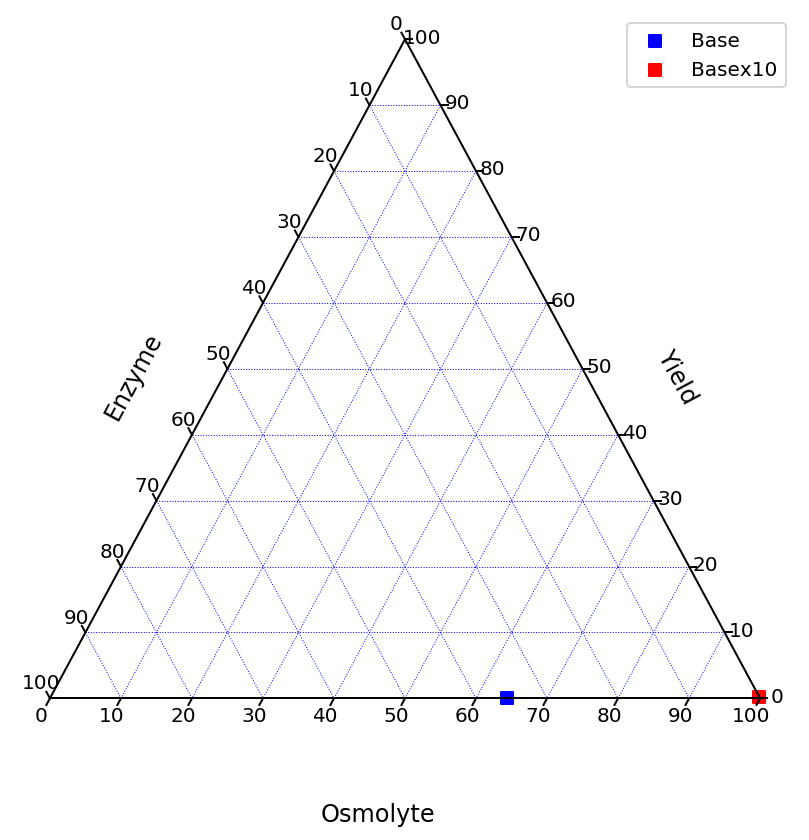

In [121]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,7)

#tax.scatter(community_base_alive.iloc[365*6-257:365*6-75,:].values, marker='s', color='blue', label="Red Squares")

#tax.scatter(community_basex10_alive.iloc[365*6-257:365*6-75,:].values, marker='s', color='red',label="Red Squares",alpha=0.5)

#tax.scatter(community_base_alive.iloc[365*6-257:365*6-256,:].values, marker='s', color='blue', label="Red Squares")
#tax.scatter(community_basex10_alive.iloc[365*6-257:365*6-256,:].values, marker='s', color='red',label="Red Squares",alpha=0.5)

tax.scatter(community_base_alive.iloc[365*6-76:365*6-75,:].values, marker='s', color='blue', label="Base")
tax.scatter(community_basex10_alive.iloc[365*6-76:365*6-75,:].values, marker='s', color='red',label="Basex10")

tax.legend()

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =12
tax.left_axis_label("Enzyme", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Yield", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Osmolyte", fontsize=fontsize, offset=0.14)

tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()